# **TinyVGG, BNN and Data Augmentation project**

## Resources

### Libraries

In [1]:
# Import torch
import torch
from torch import nn

# Import TorchVision domain library
import torchvision
from torchvision import transforms

# Impor torchinfo
from torchinfo import summary

# Import matplot
import matplotlib.pyplot as plt

Local scripts etc.:

In [2]:
# Import from script folder
from scripts import engine, utils, data_setup
from scripts.engine import train

# Import from helper functions
import helper_functions as hf

### Device-agnostic code

In [3]:
# Setup device-agnostic code 
if torch.cuda.is_available():
    device = "cuda" # NVIDIA GPU
elif torch.backends.mps.is_available():
    device = "mps" # Apple GPU
else:
    device = "cpu" # CPU

device

'cuda'

## Data and datasets

Prepare data setup:

In [4]:
from lib.data_download import download_kaggle_dataset, train_test_split

### Dog breeds data

In [5]:
# Download dog data
#download_kaggle_dataset('s4lman/dog-breed-image-dataset-256x256')

In [6]:
#train_test_split('data/dogs', 'data/dog_breeds', split_ratio=0.8)

### CIFAR-10 data

In [7]:
# Download CIFAR-10
#download_kaggle_dataset('swaroopkml/cifar10-pngs-in-folders')

### Setup paths

In [8]:
from pathlib import Path

data_path = Path("data/")

# Setup paths
cifar_10_path = data_path / "cifar10/cifar10/"
dog_path = data_path / "dog_breeds/"

In [9]:
# Setup training directory paths
cifar_train_dir = cifar_10_path / "train"
dog_train_dir = dog_path / "train"

# Setup testing directory paths
cifar_test_dir = cifar_10_path / "test"
dog_test_dir = dog_path / "test"

In [10]:
# Check the directories
#print(f"Training directory cifar: {cifar_train_dir}")
#print(f"Testing directory cifar: {cifar_test_dir}")
#print()
#print(f"Training directory dog: {dog_train_dir}")
#print(f"Testing directory dog: {dog_test_dir}")

## Data augmentation

In [11]:
# Normalize for CIFAR-10
normalize = transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
resize = transforms.Resize((64, 64))

# Auto augmentations
std_tf = transforms.Compose([
    resize,
    transforms.ToTensor(),
    normalize
])

tf_a1 = transforms.Compose([
    resize,
    transforms.AutoAugment(),
    transforms.ToTensor(),
    normalize
])

tf_a2 = transforms.Compose([
    resize,
    transforms.RandAugment(),
    transforms.ToTensor(),
    normalize
])

tf_a3 = transforms.Compose([
    resize,
    transforms.AugMix(),
    transforms.ToTensor(),
    normalize
])

tf_a4 = transforms.Compose([
    resize,
    transforms.TrivialAugmentWide(),
    transforms.ToTensor(),
    normalize
])

# Manual augmentations, inspired by https://www.sciencedirect.com/science/article/pii/S2772375523001089
# Set the values for augmentation
rotation_range = 30
width_shift_range = 0.2
height_shift_range = 0.2
zoom_range = 0.2
vertical_flip = True
horizontal_flip = True

# Define the transformations
manual_tf = transforms.Compose([
    resize,
    transforms.RandomRotation(degrees=rotation_range),
    transforms.RandomAffine(degrees=0, translate=(width_shift_range, height_shift_range), scale=(1 - zoom_range, 1 + zoom_range)),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor(),
    normalize
])

# Assemble the transform variations into a list
#transforms_list = [std_tf, tf_a1, tf_a2, tf_a3, tf_a4]

### Turn data into DataLoaders 

In [12]:
BATCH_SIZE = 64

#### CIFAR-10 dataloaders and class names

In [13]:
# No data augmentation
train_dataloader_cifar, test_dataloader_cifar, cifar_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=cifar_train_dir,
                                                                                          test_dir=cifar_test_dir,
                                                                                          train_transform=std_tf,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

# AutoAugment
train_dataloader_cifar_AutoAugment, test_dataloader_cifar_AutoAugment, cifar_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=cifar_train_dir,
                                                                                          test_dir=cifar_test_dir,
                                                                                          train_transform=tf_a1,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

# RandAugment
train_dataloader_cifar_RandAugment, test_dataloader_cifar_RandAugment, cifar_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=cifar_train_dir,
                                                                                          test_dir=cifar_test_dir,
                                                                                          train_transform=tf_a2,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

# AugMix
train_dataloader_cifar_AugMix, test_dataloader_cifar_AugMix, cifar_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=cifar_train_dir,
                                                                                          test_dir=cifar_test_dir,
                                                                                          train_transform=tf_a3,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

# TrivialAugmentWide
train_dataloader_cifar_TrivialAugmentWide, test_dataloader_cifar_TrivialAugmentWide, cifar_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=cifar_train_dir,
                                                                                          test_dir=cifar_test_dir,
                                                                                          train_transform=tf_a4,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

# Manual data augmentation
train_dataloader_cifar_ManualAugment, test_dataloader_cifar_ManualAugment, cifar_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=cifar_train_dir,
                                                                                          test_dir=cifar_test_dir,
                                                                                          train_transform=manual_tf,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

In [14]:
print(f"Number of classes: {len(cifar_class_names)}, class names: {cifar_class_names}")

Number of classes: 10, class names: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#### Dog breeds dataloaders and class names

In [15]:
# No data augmentation
train_dataloader_dog, test_dataloader_dog, dog_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=dog_train_dir,
                                                                                          test_dir=dog_test_dir,
                                                                                          train_transform=std_tf,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

# AutoAugment
train_dataloader_dog_AutoAugment, test_dataloader_dog_AutoAugment, dog_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=dog_train_dir,
                                                                                          test_dir=dog_test_dir,
                                                                                          train_transform=tf_a1,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

# RandAugment
train_dataloader_dog_RandAugment, test_dataloader_dog_RandAugment, dog_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=dog_train_dir,
                                                                                          test_dir=dog_test_dir,
                                                                                          train_transform=tf_a2,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

# AugMix
train_dataloader_dog_AugMix, test_dataloader_dog_AugMix, dog_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=dog_train_dir,
                                                                                          test_dir=dog_test_dir,
                                                                                          train_transform=tf_a3,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

# TrivialAugmentWide
train_dataloader_dog_TrivialAugmentWide, test_dataloader_dog_TrivialAugmentWide, dog_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=dog_train_dir,
                                                                                          test_dir=dog_test_dir,
                                                                                          train_transform=tf_a4,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

# Manual data augmentation
train_dataloader_dog_ManualAugment, test_dataloader_dog_ManualAugment, dog_class_names = data_setup.create_dataloaders(
                                                                                          train_dir=dog_train_dir,
                                                                                          test_dir=dog_test_dir,
                                                                                          train_transform=manual_tf,
                                                                                          test_transform=std_tf,
                                                                                          batch_size=BATCH_SIZE)

In [16]:
print(f"Number of classes: {len(dog_class_names)}, class names: {dog_class_names}")

Number of classes: 3, class names: ['Bulldog', 'Chihuahua', 'GoldenRetreiver']


### View dataloader images

In [17]:
# Visualize different samples from both dataloaders (aug and no aug)
def view_dataloader_images(dataloader, class_names, n=10):
    if n > 10:
        print(f"Having n higher than 10 will create messy plots, lowering to 10.")
        n = 10
    imgs, labels = next(iter(dataloader))
    plt.figure(figsize=(16, 8))
    for i in range(n):
        # Min max scale the image for display purposes
        targ_image = imgs[i]
        sample_min, sample_max = targ_image.min(), targ_image.max()
        sample_scaled = (targ_image - sample_min)/(sample_max - sample_min)

        # Plot images with appropriate axes information
        plt.subplot(1, 10, i+1)
        plt.imshow(sample_scaled.permute(1, 2, 0)) # resize for Matplotlib requirements
        plt.title(class_names[labels[i]])
        plt.axis(False)

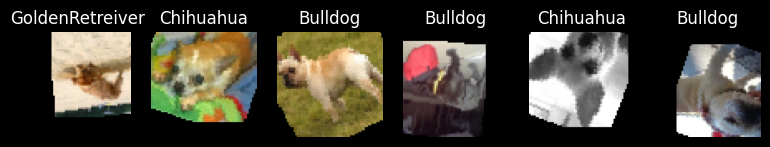

In [18]:
# Samples with data augmentation
view_dataloader_images(train_dataloader_dog_ManualAugment,
                       dog_class_names,
                       n=6)

## Create models and setup experiments

In [19]:
from torchinfo import summary

In [20]:
# Modify this for vanilla TinyVGG
HIDDEN_UNITS = 10

# Create epoch list
num_epochs = [100]#[10, 20]

# Set learning rate
lr = 0.001

### CIFAR-10 model and experiments

In [21]:
from scripts import model

dropout = 0.5

model_cifar = model.TinyVGG(
                            input_shape=3,
                            output_shape=len(cifar_class_names),
                            hidden_units=HIDDEN_UNITS,
                            )

model_cifar_dropout = model.TinyVGG_MultiDropout(
                            input_shape=3,
                            output_shape=len(cifar_class_names),
                            hidden_units=HIDDEN_UNITS,
                            dropout=dropout
                            )

summary(model=model_cifar,
        input_size=(1, 3, 64, 64),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
TinyVGG (TinyVGG)                        [1, 3, 64, 64]       [1, 10]              --                   True
├─Sequential (conv_block_1)              [1, 3, 64, 64]       [1, 10, 30, 30]      --                   True
│    └─Conv2d (0)                        [1, 3, 64, 64]       [1, 10, 62, 62]      280                  True
│    └─ReLU (1)                          [1, 10, 62, 62]      [1, 10, 62, 62]      --                   --
│    └─Conv2d (2)                        [1, 10, 62, 62]      [1, 10, 60, 60]      910                  True
│    └─ReLU (3)                          [1, 10, 60, 60]      [1, 10, 60, 60]      --                   --
│    └─MaxPool2d (4)                     [1, 10, 60, 60]      [1, 10, 30, 30]      --                   --
├─Sequential (conv_block_2)              [1, 10, 30, 30]      [1, 10, 13, 13]      --                   True
│    └─Conv2d (0)   

In [22]:
cifar_models = ["model_cifar", "model_cifar_dropout"]

# Create dataloaders dictionary for various dataloaders
train_dataloaders_cifar = {"no_aug": train_dataloader_cifar,
                     "AutoAugment": train_dataloader_cifar_AutoAugment,
                     "RandAugment": train_dataloader_cifar_RandAugment,
                     "AugMix": train_dataloader_cifar_AugMix,
                     "TrivialAugmentWide": train_dataloader_cifar_TrivialAugmentWide,
                     #"ManualAugment": train_dataloader_cifar_ManualAugment
                     }

With dataloader looping:

In [25]:
%%time

from scripts.utils import save_model
from scripts.engine import train
from lib.experiment_tracking import create_writer

# 1. Set the random seeds
hf.set_seeds(seed=42)

# 2. Keep track of experiment numbers
experiment_number = 0

# 3. Loop through each DataLoader
for dataloader_name, train_dataloader_cifar in train_dataloaders_cifar.items():

    # 4. Loop through each number of epochs
    for epochs in num_epochs: 
      
        model_name = "model_cifar"

        # 6. Create information print outs
        experiment_number += 1
        print(f"[INFO] Experiment number: {experiment_number}")
        print(f"[INFO] Model: {model_name}")
        print(f"[INFO] DataLoader: {dataloader_name}")
        print(f"[INFO] Number of epochs: {epochs}")

        # 7. Select the model
        model = model_cifar

        # 8. Create a new loss and optimizer for every model
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)

        # 9. Train target model with target dataloaders and track experiments
        train(model=model,
              train_dataloader=train_dataloader_cifar,
              test_dataloader=test_dataloader_cifar,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=epochs,
              device=device,
              writer=create_writer(experiment_name=dataloader_name,
                                    model_name=model_name,
                                    extra=f"{epochs}_epochs"))
        
        # 10. Save the model to file so we can get back the best model
        save_filepath = f"{experiment_number:04d}_{model_name}_{dataloader_name}_{epochs}_epochs.pth"
        save_model(model=model,
                    target_dir="models",
                    model_name=save_filepath)
        print("-"*50 + "\n")

[INFO] Experiment number: 1
[INFO] Model: model_cifar
[INFO] DataLoader: no_aug
[INFO] Number of epochs: 25
[INFO] Created SummaryWriter, saving to: runs/2024-01-11/no_aug/model_cifar/25_epochs...


  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4005 | train_acc: 0.4983 | test_loss: 1.3306 | test_acc: 0.5242
Epoch: 2 | train_loss: 1.2804 | train_acc: 0.5501 | test_loss: 1.2523 | test_acc: 0.5584
Epoch: 3 | train_loss: 1.2023 | train_acc: 0.5773 | test_loss: 1.2016 | test_acc: 0.5693
Epoch: 4 | train_loss: 1.1549 | train_acc: 0.5948 | test_loss: 1.1958 | test_acc: 0.5747
Epoch: 5 | train_loss: 1.1165 | train_acc: 0.6099 | test_loss: 1.1676 | test_acc: 0.5941
Epoch: 6 | train_loss: 1.0871 | train_acc: 0.6187 | test_loss: 1.1568 | test_acc: 0.5967
Epoch: 7 | train_loss: 1.0541 | train_acc: 0.6338 | test_loss: 1.1293 | test_acc: 0.6007
Epoch: 8 | train_loss: 1.0276 | train_acc: 0.6404 | test_loss: 1.0930 | test_acc: 0.6164
Epoch: 9 | train_loss: 1.0052 | train_acc: 0.6481 | test_loss: 1.0985 | test_acc: 0.6133
Epoch: 10 | train_loss: 0.9841 | train_acc: 0.6529 | test_loss: 1.0807 | test_acc: 0.6203
Epoch: 11 | train_loss: 0.9709 | train_acc: 0.6614 | test_loss: 1.0860 | test_acc: 0.6182
Epoch: 12 | train_l

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.4275 | train_acc: 0.5179 | test_loss: 1.1227 | test_acc: 0.6039
Epoch: 2 | train_loss: 1.3322 | train_acc: 0.5452 | test_loss: 1.1126 | test_acc: 0.6173
Epoch: 3 | train_loss: 1.3193 | train_acc: 0.5461 | test_loss: 1.1179 | test_acc: 0.6101
Epoch: 4 | train_loss: 1.3017 | train_acc: 0.5542 | test_loss: 1.0781 | test_acc: 0.6246
Epoch: 5 | train_loss: 1.2879 | train_acc: 0.5546 | test_loss: 1.0765 | test_acc: 0.6197
Epoch: 6 | train_loss: 1.2748 | train_acc: 0.5614 | test_loss: 1.0974 | test_acc: 0.6115
Epoch: 7 | train_loss: 1.2693 | train_acc: 0.5650 | test_loss: 1.0812 | test_acc: 0.6221
Epoch: 8 | train_loss: 1.2603 | train_acc: 0.5658 | test_loss: 1.0649 | test_acc: 0.6329
Epoch: 9 | train_loss: 1.2571 | train_acc: 0.5665 | test_loss: 1.0473 | test_acc: 0.6379
Epoch: 10 | train_loss: 1.2474 | train_acc: 0.5694 | test_loss: 1.0456 | test_acc: 0.6373
Epoch: 11 | train_loss: 1.2455 | train_acc: 0.5735 | test_loss: 1.0573 | test_acc: 0.6334
Epoch: 12 | train_l

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1690 | train_acc: 0.5901 | test_loss: 0.9965 | test_acc: 0.6516
Epoch: 2 | train_loss: 1.1374 | train_acc: 0.6022 | test_loss: 0.9816 | test_acc: 0.6530
Epoch: 3 | train_loss: 1.1203 | train_acc: 0.6058 | test_loss: 0.9765 | test_acc: 0.6554
Epoch: 4 | train_loss: 1.1181 | train_acc: 0.6090 | test_loss: 0.9901 | test_acc: 0.6513
Epoch: 5 | train_loss: 1.1063 | train_acc: 0.6120 | test_loss: 0.9627 | test_acc: 0.6612
Epoch: 6 | train_loss: 1.1044 | train_acc: 0.6117 | test_loss: 0.9797 | test_acc: 0.6570
Epoch: 7 | train_loss: 1.0991 | train_acc: 0.6140 | test_loss: 0.9792 | test_acc: 0.6564
Epoch: 8 | train_loss: 1.0979 | train_acc: 0.6137 | test_loss: 0.9709 | test_acc: 0.6600
Epoch: 9 | train_loss: 1.0947 | train_acc: 0.6182 | test_loss: 0.9743 | test_acc: 0.6606
Epoch: 10 | train_loss: 1.0872 | train_acc: 0.6168 | test_loss: 0.9503 | test_acc: 0.6714
Epoch: 11 | train_loss: 1.0819 | train_acc: 0.6215 | test_loss: 0.9642 | test_acc: 0.6586
Epoch: 12 | train_l

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9201 | train_acc: 0.6772 | test_loss: 0.9387 | test_acc: 0.6726
Epoch: 2 | train_loss: 0.9091 | train_acc: 0.6824 | test_loss: 0.9525 | test_acc: 0.6626
Epoch: 3 | train_loss: 0.8957 | train_acc: 0.6870 | test_loss: 0.9465 | test_acc: 0.6681
Epoch: 4 | train_loss: 0.8895 | train_acc: 0.6879 | test_loss: 0.9745 | test_acc: 0.6615
Epoch: 5 | train_loss: 0.8814 | train_acc: 0.6927 | test_loss: 0.9532 | test_acc: 0.6719
Epoch: 6 | train_loss: 0.8765 | train_acc: 0.6912 | test_loss: 0.9548 | test_acc: 0.6723
Epoch: 7 | train_loss: 0.8798 | train_acc: 0.6911 | test_loss: 0.9789 | test_acc: 0.6610
Epoch: 8 | train_loss: 0.8725 | train_acc: 0.6942 | test_loss: 0.9651 | test_acc: 0.6672
Epoch: 9 | train_loss: 0.8696 | train_acc: 0.6954 | test_loss: 1.0034 | test_acc: 0.6555
Epoch: 10 | train_loss: 0.8632 | train_acc: 0.6984 | test_loss: 0.9866 | test_acc: 0.6589
Epoch: 11 | train_loss: 0.8691 | train_acc: 0.6967 | test_loss: 0.9859 | test_acc: 0.6564
Epoch: 12 | train_l

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.3117 | train_acc: 0.5566 | test_loss: 0.9987 | test_acc: 0.6487
Epoch: 2 | train_loss: 1.2740 | train_acc: 0.5588 | test_loss: 0.9875 | test_acc: 0.6530
Epoch: 3 | train_loss: 1.2611 | train_acc: 0.5649 | test_loss: 0.9784 | test_acc: 0.6536
Epoch: 4 | train_loss: 1.2569 | train_acc: 0.5643 | test_loss: 0.9712 | test_acc: 0.6563
Epoch: 5 | train_loss: 1.2556 | train_acc: 0.5653 | test_loss: 0.9750 | test_acc: 0.6578
Epoch: 6 | train_loss: 1.2488 | train_acc: 0.5651 | test_loss: 0.9777 | test_acc: 0.6550
Epoch: 7 | train_loss: 1.2494 | train_acc: 0.5654 | test_loss: 0.9741 | test_acc: 0.6596
Epoch: 8 | train_loss: 1.2426 | train_acc: 0.5673 | test_loss: 0.9740 | test_acc: 0.6623
Epoch: 9 | train_loss: 1.2347 | train_acc: 0.5696 | test_loss: 0.9889 | test_acc: 0.6538
Epoch: 10 | train_loss: 1.2346 | train_acc: 0.5692 | test_loss: 0.9632 | test_acc: 0.6630
Epoch: 11 | train_loss: 1.2342 | train_acc: 0.5713 | test_loss: 0.9800 | test_acc: 0.6576
Epoch: 12 | train_l

  0%|          | 0/25 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.6429 | train_acc: 0.3949 | test_loss: 1.1188 | test_acc: 0.5971
Epoch: 2 | train_loss: 1.5641 | train_acc: 0.4263 | test_loss: 1.1265 | test_acc: 0.6000
Epoch: 3 | train_loss: 1.5386 | train_acc: 0.4357 | test_loss: 1.1683 | test_acc: 0.5860
Epoch: 4 | train_loss: 1.5212 | train_acc: 0.4435 | test_loss: 1.1655 | test_acc: 0.5808
Epoch: 5 | train_loss: 1.5064 | train_acc: 0.4496 | test_loss: 1.2327 | test_acc: 0.5629
Epoch: 6 | train_loss: 1.4934 | train_acc: 0.4544 | test_loss: 1.1627 | test_acc: 0.5834
Epoch: 7 | train_loss: 1.4857 | train_acc: 0.4595 | test_loss: 1.1697 | test_acc: 0.5734
Epoch: 8 | train_loss: 1.4775 | train_acc: 0.4619 | test_loss: 1.1981 | test_acc: 0.5657
Epoch: 9 | train_loss: 1.4674 | train_acc: 0.4672 | test_loss: 1.1922 | test_acc: 0.5723
Epoch: 10 | train_loss: 1.4704 | train_acc: 0.4666 | test_loss: 1.1941 | test_acc: 0.5723
Epoch: 11 | train_loss: 1.4564 | train_acc: 0.4720 | test_loss: 1.1983 | test_acc: 0.5715
Epoch: 12 | train_l

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs

### Dog breeds model and experiments

In [22]:
from scripts import model

dropout = 0.5

model_dog = model.TinyVGG(
                            input_shape=3,
                            output_shape=len(dog_class_names),
                            hidden_units=HIDDEN_UNITS,
                            )

model_dog_cifar = model.TinyVGG_MultiDropout(
                            input_shape=3,
                            output_shape=len(dog_class_names),
                            hidden_units=HIDDEN_UNITS,
                            dropout=dropout
                            )

summary(model=model_dog,
        input_size=(1, 3, 64, 64),
        col_names=["input_size", "output_size", "num_params", "trainable"],
        col_width=20,
        row_settings=["var_names"])

Layer (type (var_name))                  Input Shape          Output Shape         Param #              Trainable
TinyVGG (TinyVGG)                        [1, 3, 64, 64]       [1, 3]               --                   True
├─Sequential (conv_block_1)              [1, 3, 64, 64]       [1, 10, 30, 30]      --                   True
│    └─Conv2d (0)                        [1, 3, 64, 64]       [1, 10, 62, 62]      280                  True
│    └─ReLU (1)                          [1, 10, 62, 62]      [1, 10, 62, 62]      --                   --
│    └─Conv2d (2)                        [1, 10, 62, 62]      [1, 10, 60, 60]      910                  True
│    └─ReLU (3)                          [1, 10, 60, 60]      [1, 10, 60, 60]      --                   --
│    └─MaxPool2d (4)                     [1, 10, 60, 60]      [1, 10, 30, 30]      --                   --
├─Sequential (conv_block_2)              [1, 10, 30, 30]      [1, 10, 13, 13]      --                   True
│    └─Conv2d (0)   

In [23]:
# Create models list
models = ["model_dog", "model_dog_dropout"]

# Create dataloaders dictionary for various dataloaders
train_dataloaders_dog = {"no_aug": train_dataloader_dog,
                     #"AutoAugment": train_dataloader_dog_AutoAugment,
                     #"RandAugment": train_dataloader_dog_RandAugment,
                     "AugMix": train_dataloader_dog_AugMix,
                     #"TrivialAugmentWide": train_dataloader_dog_TrivialAugmentWide,
                     #"ManualAugment": train_dataloader_dog_ManualAugment
                     }

In [24]:
%%time
from scripts.utils import save_model
from scripts.engine import train
from lib.experiment_tracking import create_writer

# 1. Set the random seeds
hf.set_seeds(seed=42)

# 2. Keep track of experiment numbers
experiment_number = 0

# 3. Loop through each DataLoader
for dataloader_name, train_dataloader_dog in train_dataloaders_dog.items():

    # 4. Loop through each number of epochs
    for epochs in num_epochs: 
      
        model_name = "model_dog"

         # 6. Create information print outs
        experiment_number += 1
        print(f"[INFO] Experiment number: {experiment_number}")
        print(f"[INFO] Model: {model_name}")
        print(f"[INFO] DataLoader: {dataloader_name}")
        print(f"[INFO] Number of epochs: {epochs}")  

        # 7. Select the model
        model = model_dog

        # 8. Create a new loss and optimizer for every model
        loss_fn = nn.CrossEntropyLoss()
        optimizer = torch.optim.Adam(params=model.parameters(), lr=lr)
        #optimizer = torch.optim.SGD(model.parameters(), lr=lr)

        # 9. Train target model with target dataloaders and track experiments
        train(model=model,
              train_dataloader=train_dataloader_dog,
              test_dataloader=test_dataloader_dog,
              optimizer=optimizer,
              loss_fn=loss_fn,
              epochs=epochs,
              device=device,
              writer=create_writer(experiment_name=dataloader_name,
                                    model_name=model_name,
                                    extra=f"{epochs}_epochs"))
        
        # 10. Save the model to file so we can get back the best model
        save_filepath = f"{experiment_number:04d}_{model_name}_{dataloader_name}_{epochs}_epochs.pth"
        save_model(model=model,
                    target_dir="models",
                    model_name=save_filepath)
        print("-"*50 + "\n")

[INFO] Experiment number: 1
[INFO] Model: model_dog
[INFO] DataLoader: no_aug
[INFO] Number of epochs: 100
[INFO] Created SummaryWriter, saving to: runs/2024-01-11/no_aug/model_dog/100_epochs...


  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0994 | train_acc: 0.3279 | test_loss: 1.1001 | test_acc: 0.3158
Epoch: 2 | train_loss: 1.0994 | train_acc: 0.3272 | test_loss: 1.0991 | test_acc: 0.3298
Epoch: 3 | train_loss: 1.0993 | train_acc: 0.3270 | test_loss: 1.0992 | test_acc: 0.3298
Epoch: 4 | train_loss: 1.0992 | train_acc: 0.3278 | test_loss: 1.0988 | test_acc: 0.3368
Epoch: 5 | train_loss: 1.0992 | train_acc: 0.3272 | test_loss: 1.0998 | test_acc: 0.3228
Epoch: 6 | train_loss: 1.0992 | train_acc: 0.3278 | test_loss: 1.0993 | test_acc: 0.3298
Epoch: 7 | train_loss: 1.0991 | train_acc: 0.3274 | test_loss: 1.0994 | test_acc: 0.3248
Epoch: 8 | train_loss: 1.0991 | train_acc: 0.3278 | test_loss: 1.0986 | test_acc: 0.3387
Epoch: 9 | train_loss: 1.0990 | train_acc: 0.3285 | test_loss: 1.0993 | test_acc: 0.3287
Epoch: 10 | train_loss: 1.0990 | train_acc: 0.3269 | test_loss: 1.0992 | test_acc: 0.3306
Epoch: 11 | train_loss: 1.0989 | train_acc: 0.3261 | test_loss: 1.0994 | test_acc: 0.3186
Epoch: 12 | train_l

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0964 | train_acc: 0.4457 | test_loss: 1.0961 | test_acc: 0.4088
Epoch: 2 | train_loss: 1.0962 | train_acc: 0.4382 | test_loss: 1.0966 | test_acc: 0.4157
Epoch: 3 | train_loss: 1.0961 | train_acc: 0.4462 | test_loss: 1.0958 | test_acc: 0.4277
Epoch: 4 | train_loss: 1.0962 | train_acc: 0.4413 | test_loss: 1.0953 | test_acc: 0.4417
Epoch: 5 | train_loss: 1.0961 | train_acc: 0.4413 | test_loss: 1.0960 | test_acc: 0.4068
Epoch: 6 | train_loss: 1.0960 | train_acc: 0.4459 | test_loss: 1.0958 | test_acc: 0.4049
Epoch: 7 | train_loss: 1.0958 | train_acc: 0.4476 | test_loss: 1.0957 | test_acc: 0.4169
Epoch: 8 | train_loss: 1.0958 | train_acc: 0.4445 | test_loss: 1.0961 | test_acc: 0.4099
Epoch: 9 | train_loss: 1.0957 | train_acc: 0.4431 | test_loss: 1.0963 | test_acc: 0.4099
Epoch: 10 | train_loss: 1.0957 | train_acc: 0.4527 | test_loss: 1.0957 | test_acc: 0.4238
Epoch: 11 | train_loss: 1.0955 | train_acc: 0.4445 | test_loss: 1.0959 | test_acc: 0.4029
Epoch: 12 | train_l

KeyboardInterrupt: 

In [ ]:
%load_ext tensorboard
%tensorboard --logdir runs